# 📌 분류 실습 2편

## 1. 기본 설정 ❗

--분석에 필요한 기본 모듈--

In [608]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sklearn
import time
import matplotlib.pyplot as plt
import seaborn as sns

--분석에 필요한 알고리즘 모델--

In [609]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

import scipy.stats
from scipy.stats import probplot
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.ensemble import RandomForestRegressor

## 2. EDA 및 데이터 전처리 📂

In [610]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 간단한 EDA

In [611]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216


In [612]:
test

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0
...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0


In [613]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 125.5 KB


In [614]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [615]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [616]:
test.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,715.000000,715.000000,714.000000,714.000000,714.000000,714.000000,714.000000,680.000000,678.000000,679.000000
mean,1056.854545,11.472727,23.263305,0.051821,2.388515,56.668067,1359.494398,0.041196,36.930678,24.939617
std,625.574471,6.928427,4.039645,0.221820,1.171270,19.661880,614.171870,0.020656,12.641503,10.075857
min,0.000000,0.000000,14.600000,0.000000,0.000000,16.000000,126.000000,0.003000,9.000000,7.000000
25%,507.000000,5.500000,20.300000,0.000000,1.500000,42.000000,807.250000,0.027000,28.000000,17.000000
50%,1046.000000,11.000000,22.900000,0.000000,2.300000,55.000000,1489.000000,0.039000,35.000000,24.000000
75%,1616.500000,17.000000,26.375000,0.000000,3.275000,73.750000,2000.000000,0.052250,45.000000,31.000000
max,2177.000000,23.000000,33.800000,1.000000,5.900000,100.000000,2000.000000,0.138000,94.000000,69.000000


- Train Set과 Test Set의 예측 변수들의 평균, 최솟값 등을 보았을 때 hour_bef_Temperature처럼 크게 차이나는 (평균이 16과 23) 변수들을 몇 개 발견할 수 있었다. 이는 예측 모델링 시 유의해야 할 점인 것 같다.

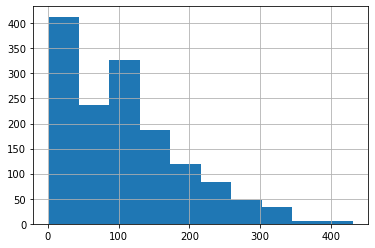

In [617]:
# Train Set의 타겟 변수 분포 확인
train['count'].hist()

- 타겟 변수의 분포가 한 쪽으로 치우침을 알 수 있다.

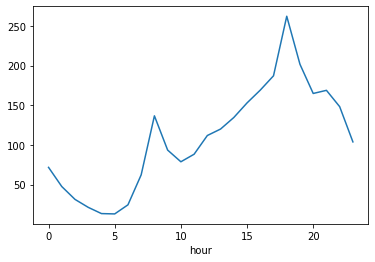

In [618]:
train.groupby(['hour'])['count'].mean().plot()

- 오전보다는 오후가 이용량이 많다.
- 18시에 이용량이 가장 많고, 5시에 가장 적다.
- 따릉이 이용량이 급격하게 증가한 구간은 '7시-8시'와 '17-18시'이다. → 이는 출퇴근 시간과 연관이 있음을 추측할 수 있다.

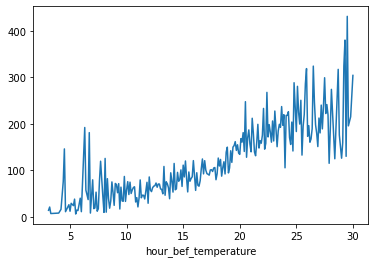

In [619]:
# 기온별 평균 따릉이 이용량 (temperature 변수가 연속형이기 때문에 확 튀는 부분은 평균이 아닌 특이값일 수 있음)
train.groupby(['hour_bef_temperature'])['count'].mean().plot()

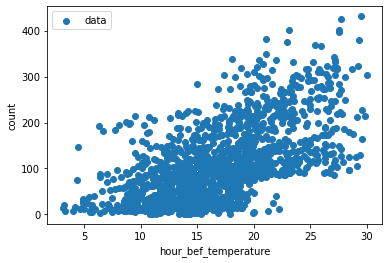

In [620]:
# 기온과 따릉이 이용량의 산점도
plt.scatter(train['hour_bef_temperature'], train['count'], label='data')
plt.legend(loc='best')
plt.xlabel('hour_bef_temperature')
plt.ylabel('count')
plt.show()

- 기온이 높을수록 따릉이 이용량이 많다. 

In [621]:
# Train Set의 상관계수 확인
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


In [622]:
# 강수량별 평균 따릉이 이용량
train.groupby(['hour_bef_precipitation'])['count'].mean()

hour_bef_precipitation
0.0    111.130404
1.0     33.673913
Name: count, dtype: float64

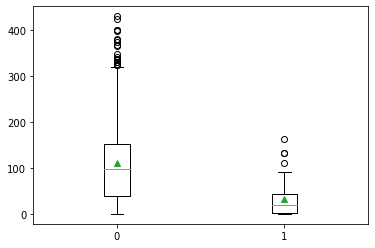

In [623]:
# 강수량별 따릉이 박스플롯
data = [train[train['hour_bef_precipitation']==0.0]['count'], 
        train[train['hour_bef_precipitation']==1.0]['count']]

plt.boxplot(data, labels=['0', '1'], showmeans=True)
plt.show()

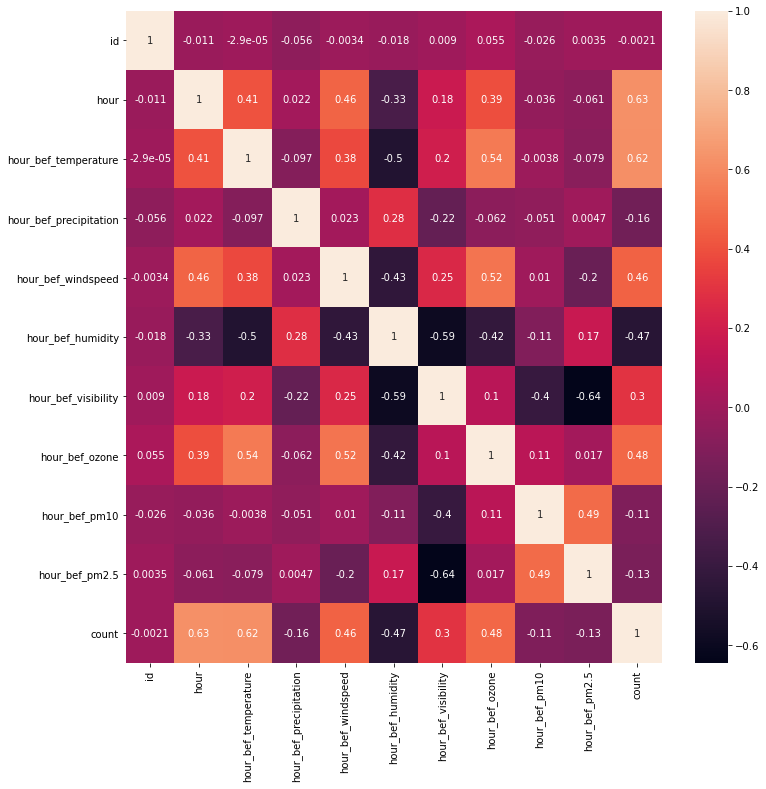

In [624]:
plt.figure(figsize = (12,12))
sns.heatmap(train.corr(),annot = True)

- 상관계수를 통해 타겟 변수인 'count'에 가장 영향을 미치는 변수가 'hour' 시간 변수와 'hour_bef_temperature' 변수라는 것을 알 수 있다.

### 모델 학습에 필요한 필수 전처리

In [625]:
# .으로 인한 오류로 변수명에서 .제거
train = train.rename({'hour_bef_pm2.5': 'hour_bef_pm25'}, axis=1)
test = test.rename({'hour_bef_pm2.5': 'hour_bef_pm25'}, axis=1)

In [626]:
# Train Set 결측치 개수 확인
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm25             117
count                       0
dtype: int64

In [627]:
# Test Set 결측치 개수 확인
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm25             36
dtype: int64

In [628]:
# 범주형 데이터 결측치 대체
train['hour_bef_precipitation'] = train['hour_bef_precipitation'].fillna(value = train['hour_bef_precipitation'].mean())

In [629]:
train_isna_sum = train.isna().sum()
test_isna_sum = test.isna().sum()

In [630]:
train_isna_sum[train_isna_sum != 0].index

Index(['hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity',
       'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10',
       'hour_bef_pm25'],
      dtype='object')

In [631]:
test_isna_sum[test_isna_sum != 0].index

Index(['hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed',
       'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone',
       'hour_bef_pm10', 'hour_bef_pm25'],
      dtype='object')

In [632]:
na_columns = train_isna_sum[train_isna_sum != 0].index

def fill_bicycle_na(df,column) :
    df[column] = df[column].fillna(value = df[column].mean())
    
for col in na_columns:
    fill_bicycle_na(train, col)
    print(col,'결측값 대체 완료')

hour_bef_temperature 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm25 결측값 대체 완료


In [633]:
na_columns = test_isna_sum[test_isna_sum != 0].index

def fill_bicycle_na(df,column) :
    df[column] = df[column].fillna(value = df[column].mean())
    
for col in na_columns:
    fill_bicycle_na(test, col)
    print(col,'결측값 대체 완료')

hour_bef_temperature 결측값 대체 완료
hour_bef_precipitation 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm25 결측값 대체 완료


In [634]:
train.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm25             0
count                     0
dtype: int64

In [635]:
test.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm25             0
dtype: int64

### 회귀 모형 가정 확인

In [636]:
# 오래 걸려서 
#sns.pairplot(train, diag_kind='hist')
#plt.show()

#### 선형성

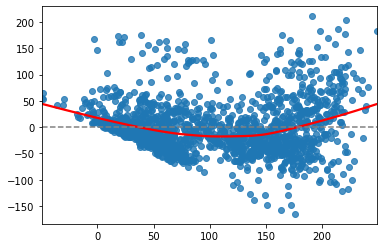

In [637]:
fit = ols(formula = 'count~ hour+ hour_bef_temperature+ hour_bef_precipitation+ hour_bef_windspeed+ hour_bef_humidity+ hour_bef_visibility+ hour_bef_ozone+ hour_bef_pm10+ hour_bef_pm25', data = train).fit()

fitted = fit.predict(train)
residual = train['count'] - fitted

sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0,0], '--', color='grey')

- 빨간 실선이 점선에서 벗어나면 선형성이 없다는 뜻으로, 이는 선형성이 없고 이차항의 성질을 가지고 있다고 볼 수 있다.

#### 잔차의 정규성

In [638]:
residual

0       -15.723997
1        33.018025
2       -31.593218
3       -58.898507
4       182.563033
           ...    
1454    -56.206086
1455    -36.112631
1456    -62.968526
1457     18.821524
1458     -3.476118
Length: 1459, dtype: float64

In [639]:
sr = scipy.stats.zscore(residual)
sr

array([-0.30106905,  0.63219967, -0.60491873, ..., -1.20566512,
        0.36037775, -0.0665576 ])

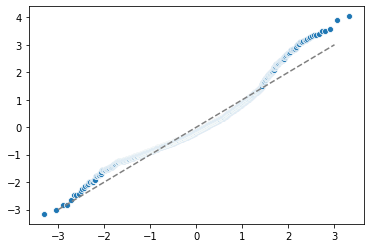

In [640]:
(x, y),_ = scipy.stats.probplot(sr)
sns.scatterplot(x,y)
plt.plot([-3,3], [-3,3], '--', color='grey')

In [641]:
scipy.stats.shapiro(residual)

(0.9468061923980713, 1.5602854600817425e-22)

In [642]:
x = 1.1851992450676099e-19
print(format(x, '.20f'))

0.00000000000000000012


- 첫 번째 값은 검정통계치, 두 번째 값은 p-value이다. 두 번 째 값인 p-value가 유의수준 0.05보다 작기 때문에 정규분포를 따른다고 판단할 수 없다. 즉 정규성을 만족한다고 할 수 없다.

#### 잔차의 등분산성

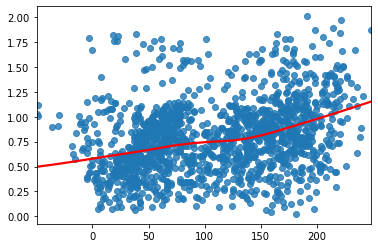

In [643]:
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess = True, line_kws = {'color': 'red'})

- 빨간색 실선이 수평선에 가까울수록 등분산성을 만족하는 것인데, 수평선에 가깝지 않을뿐 아니라 패턴이 존재하는 걸로 보아 만족했다고 할 수 없다. 

#### 잔차의 독립성

In [644]:
fit = ols(formula = 'count~ hour+ hour_bef_temperature+ hour_bef_precipitation+ hour_bef_windspeed+ hour_bef_humidity+ hour_bef_visibility+ hour_bef_ozone+ hour_bef_pm10+ hour_bef_pm25', data = train).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     241.7
Date:                Tue, 20 Jul 2021   Prob (F-statistic):          4.76e-281
Time:                        23:08:32   Log-Likelihood:                -7841.5
No. Observations:                1459   AIC:                         1.570e+04
Df Residuals:                    1449   BIC:                         1.576e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -36

- Durbin-Watson이 1.5 ~ 2.5 사이면 독립성을 만족한다고 가정하기 때문에 이는 독립성을 만족한다고 할 수 있다.

### Train/Test 데이터 분할 및 데이터 정규화

In [645]:
X_data = train[['hour','hour_bef_temperature','hour_bef_precipitation',
                'hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility',
                'hour_bef_ozone','hour_bef_pm10','hour_bef_pm25']]

In [646]:
X_data = MinMaxScaler().fit_transform(X_data)

In [647]:
X_data

array([[0.86956522, 0.49070632, 1.        , ..., 0.19672131, 0.25769231,
        0.30487805],
       [0.56521739, 0.63197026, 0.        , ..., 0.31967213, 0.24615385,
        0.3902439 ],
       [0.26086957, 0.40148699, 0.        , ..., 0.24590164, 0.08846154,
        0.13414634],
       ...,
       [0.2173913 , 0.56505576, 0.        , ..., 0.04918033, 0.08076923,
        0.15853659],
       [0.91304348, 0.65427509, 0.        , ..., 0.64754098, 0.23846154,
        0.34146341],
       [0.73913043, 0.66914498, 0.        , ..., 0.35245902, 0.11153846,
        0.1097561 ]])

In [648]:
y_target = train[['count']]

In [649]:
X_train, X_test, y_train, y_test=train_test_split(X_data, y_target,
                                                  test_size=0.2, random_state=2021)

In [650]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1167, 9)
(1167, 1)
(292, 9)
(292, 1)


# 3. 모델링

## Linear Regression

In [651]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [652]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)

test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)

print('lr.coef_: {}'.format(lr.coef_))
print('Train MSE:{0:.3f}, RMSE:{1:3.3F}'.format(train_mse, train_rmse))
print('Train Variance score: {0:.3f}'.format(r2_score(y_train, y_pred_train)))
print('Test MSE:{0:.3f}, RMSE:{1:3.3F}'.format(test_mse, test_rmse))
print('Test Variance score: {0:.3f}'.format(r2_score(y_test, y_pred_test)))

lr.coef_: [[109.50356583 134.78450866 -53.30608592  42.69864492 -34.17077436
    5.26743831  43.33660178 -84.69366618   7.03210706]]
Train MSE:2721.505, RMSE:52.168
Train Variance score: 0.606
Test MSE:2768.877, RMSE:52.620
Test Variance score: 0.571


## Ridge Regression

In [653]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [654]:
ridge = Ridge(random_state=2021)

cv_method = KFold(n_splits=10)
params = {
    'alpha': [0.001, 0.005, 0.01, 0.015, 0.1, 1, 10]
}
dt_grid_cv = GridSearchCV(ridge, param_grid=params, scoring='neg_mean_squared_error', cv=cv_method, n_jobs=-1)
dt_grid_cv.fit(X_train, y_train)

y_pred_test = dt_grid_cv.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)

neg_mse = dt_grid_cv.best_score_
mse = -1 * neg_mse
rmse = np.sqrt(mse)

print(dt_grid_cv.best_params_)
print(dt_grid_cv.best_score_)
print(rmse)
print(test_rmse)

{'alpha': 1}
-2770.239490434598
52.6330646118445
52.633725763146906


## Lasso Regression

In [655]:
from sklearn.linear_model import Lasso

In [656]:
lasso = Lasso(random_state=2021)

cv_method = KFold(n_splits=10)
params = {
    'alpha': [0.0001, 0.005, 0.01, 0.1, 1, 10]
}
dt_grid_cv = GridSearchCV(lasso, param_grid=params, scoring='neg_mean_squared_error', cv=cv_method, n_jobs=-1)
dt_grid_cv.fit(X_train, y_train)

y_pred_test = dt_grid_cv.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)

neg_mse = dt_grid_cv.best_score_
mse = -1 * neg_mse
rmse = np.sqrt(mse)

print(dt_grid_cv.best_params_)
print(dt_grid_cv.best_score_)
print(rmse)
print(test_rmse)

{'alpha': 0.1}
-2768.8752662835323
52.620103252307786
52.58919179756719


## ElasticNet Regression

In [657]:
from sklearn.linear_model import ElasticNet

In [658]:
elasticnet = ElasticNet(random_state=2021)

cv_method = KFold(n_splits=10)
params = {
    'alpha': [0.0001, 0.005, 0.01, 0.1, 1, 10]
}
dt_grid_cv = GridSearchCV(elasticnet, param_grid=params, scoring='neg_mean_squared_error', cv=cv_method, n_jobs=-1)
dt_grid_cv.fit(X_train, y_train)

y_pred_test = dt_grid_cv.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)

neg_mse = dt_grid_cv.best_score_
mse = -1 * neg_mse
rmse = np.sqrt(mse)

print(dt_grid_cv.best_params_)
print(dt_grid_cv.best_score_)
print(rmse)
print(test_rmse)

{'alpha': 0.0001}
-2770.9520241321434
52.63983305570168
52.62029429905467


# 4. Polynomial 추가 모델링

In [659]:
Poly2_X_train = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
Poly2_X_test = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)

Poly3_X_train = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_train)
Poly3_X_test = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_test)

Poly4_X_train = PolynomialFeatures(degree=4, include_bias=False).fit_transform(X_train)
Poly4_X_test = PolynomialFeatures(degree=4, include_bias=False).fit_transform(X_test)

Poly5_X_train = PolynomialFeatures(degree=5, include_bias=False).fit_transform(X_train)
Poly5_X_test = PolynomialFeatures(degree=5, include_bias=False).fit_transform(X_test)

## Linear Regression

In [660]:
lr = LinearRegression()
lr.fit(Poly2_X_train, y_train)

y_pred_train = lr.predict(Poly2_X_train)
y_pred_test = lr.predict(Poly2_X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)

test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)

print('lr.coef_: {}'.format(lr.coef_))
print('Train MSE:{0:.3f}, RMSE:{1:3.3F}'.format(train_mse, train_rmse))
print('Train Variance score: {0:.3f}'.format(r2_score(y_train, y_pred_train)))
print('Test MSE:{0:.3f}, RMSE:{1:3.3F}'.format(test_mse, test_rmse))
print('Test Variance score: {0:.3f}'.format(r2_score(y_test, y_pred_test)))

lr.coef_: [[-1.35631354e+02  6.54377233e+01 -2.29618050e+03  2.02957863e+02
  -1.42660761e+02 -4.54609151e+02 -5.25250009e+02 -1.46098284e+02
  -4.53688237e+02  2.11297845e+00  3.26296014e+02 -2.52470879e+01
   1.03866914e+02  1.64829333e+01  4.38387015e+01  9.30873047e+01
  -7.34273861e+01  5.51441684e+01 -2.13627925e+02 -1.60902988e+02
  -5.47779137e+01 -3.37395946e+01  3.55941074e+01  4.25747965e+02
   1.07124931e+02 -1.38199737e+02  2.20052092e+03 -6.40912048e+01
   1.95029248e+02  7.17407800e+01 -1.25545183e+02  1.25056364e+02
  -8.65217365e+01 -1.49082239e+02 -1.39021589e+02 -4.05133565e+00
   2.32935981e+00 -1.35030754e+02  4.38907126e+01 -1.11737328e+02
   1.79220363e+02  1.48620037e+02  1.87729992e+02  2.06902123e+02
   1.40000278e+02  1.76212715e+02  2.11732223e+01  2.65349290e+02
   3.76449615e+01 -1.20535628e+02  2.58568526e+02  1.66713411e+01
   8.48087484e+01  1.31954425e+02]]
Train MSE:2161.243, RMSE:46.489
Train Variance score: 0.687
Test MSE:2553.491, RMSE:50.532
Test 

In [661]:
lr = LinearRegression()
lr.fit(Poly3_X_train, y_train)

y_pred_train = lr.predict(Poly3_X_train)
y_pred_test = lr.predict(Poly3_X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)

test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)

print('lr.coef_: {}'.format(lr.coef_))
print(train_rmse)
print(test_rmse)

lr.coef_: [[ 5.43064039e+02  1.77772212e+03  1.32740600e+02 -1.76815089e+03
   2.21284296e+03  2.37019470e+03  1.13204249e+03 -1.02617386e+03
   1.47287147e+03  1.12230249e+03 -2.21581427e+03 -5.68413024e+03
  -9.99382982e+02 -6.12395004e+02 -2.87350575e+02 -4.98770878e+02
  -1.14711224e+02  5.76447952e+02  1.10782306e+03 -5.30971229e+03
   1.53059510e+03  5.42902726e+02 -3.71629556e+03 -3.79558143e+02
  -2.93744631e+03 -2.74581541e+03  1.48883096e+03 -1.97930047e+03
  -1.85270538e+03  4.18808926e+02 -3.53577605e+02  7.99047055e+02
   1.65030815e+03  3.01606713e+02  1.93070371e+03  1.79801539e+03
  -2.82968080e+02  2.30198509e+03  2.90278161e+03 -5.34382500e+02
  -3.49425170e+03 -2.84160933e+03  3.25978335e+03 -5.38412942e+03
  -1.08930492e+03 -1.46198689e+03  1.02771475e+03 -5.31344952e+02
   9.22101989e+02 -7.89139970e+02 -8.34698790e+02  3.10332890e+03
   5.27057893e+02 -4.51387135e+02 -1.09621224e+03  6.57885561e+02
   2.22198714e+02  6.49936315e+01  1.09474206e+02  3.51887699e+01


In [670]:
lr = LinearRegression()
lr.fit(Poly4_X_train, y_train)

y_pred_train = lr.predict(Poly4_X_train)
y_pred_test = lr.predict(Poly4_X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)

test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)

print('lr.coef_: {}'.format(lr.coef_))
print(train_rmse)
print(test_rmse)

lr.coef_: [[ 3.34589065e+03 -2.50976262e+04 -3.17126495e+02  8.93826360e+03
   1.82961535e+04  1.05464687e+04  1.43904602e+03 -1.36507972e+04
   1.09753584e+04  4.19659946e+03 -3.80495061e+02 -2.14822688e+03
  -1.24591891e+04 -1.32073325e+04 -6.67995344e+03 -3.14915866e+03
   2.89744439e+04 -1.19550227e+04  3.74255426e+04 -2.34699376e+02
  -1.09842259e+04  4.63943897e+04  1.50582736e+04  2.24884270e+04
   1.19616272e+04  3.54707912e+03  8.42767901e+01 -2.66303350e+02
  -2.73226265e+02  2.65506948e+02 -1.74615804e+01 -1.19681068e+02
  -1.13299356e+02  8.79288940e+03 -1.64997212e+04 -9.18323543e+03
   1.83501173e+04 -2.76513599e+04 -3.28300107e+04 -2.79407244e+04
  -3.02353188e+04 -3.16725899e+04 -7.44907780e+03 -4.55910551e+04
  -1.57388493e+04 -7.24235314e+02  1.54867115e+04 -1.24551189e+04
  -3.41640885e+04  6.30527549e+04  2.69908522e+03  2.02018325e+04
  -9.71085815e+03  2.59371203e+03  2.36855884e+02 -1.81878994e+03
  -1.42089667e+03 -2.98424585e+03 -8.17059995e+03 -3.70100092e+03


## Ridge Regression

In [662]:
ridge = Ridge(random_state=2021)

cv_method = KFold(n_splits=10)
params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}
dt_grid_cv = GridSearchCV(ridge, param_grid=params, scoring='neg_mean_squared_error', cv=cv_method, n_jobs=-1)
dt_grid_cv.fit(Poly2_X_train, y_train)

y_pred_test = dt_grid_cv.predict(Poly2_X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)

neg_mse = dt_grid_cv.best_score_
mse = -1 * neg_mse
rmse = np.sqrt(mse)

print(dt_grid_cv.best_params_)
print(dt_grid_cv.best_score_)
print(rmse)
print(test_rmse)

{'alpha': 0.1}
-2365.3502138600097
48.634866236682605
49.9903271006844


In [663]:
ridge = Ridge(random_state=2021)

cv_method = KFold(n_splits=10)
params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}
dt_grid_cv = GridSearchCV(ridge, param_grid=params, scoring='neg_mean_squared_error', cv=cv_method, n_jobs=-1)
dt_grid_cv.fit(Poly3_X_train, y_train)

y_pred_test = dt_grid_cv.predict(Poly3_X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)

neg_mse = dt_grid_cv.best_score_
mse = -1 * neg_mse
rmse = np.sqrt(mse)

print(dt_grid_cv.best_params_)
print(dt_grid_cv.best_score_)
print(rmse)
print(test_rmse)

{'alpha': 0.01}
-2035.2292662540215
45.11351533913115
47.92931819969418


In [671]:
ridge = Ridge(random_state=2021)

cv_method = KFold(n_splits=10)
params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}
dt_grid_cv = GridSearchCV(ridge, param_grid=params, scoring='neg_mean_squared_error', cv=cv_method, n_jobs=-1)
dt_grid_cv.fit(Poly4_X_train, y_train)

y_pred_test = dt_grid_cv.predict(Poly4_X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)

neg_mse = dt_grid_cv.best_score_
mse = -1 * neg_mse
rmse = np.sqrt(mse)

print(dt_grid_cv.best_params_)
print(dt_grid_cv.best_score_)
print(rmse)
print(test_rmse)

{'alpha': 0.1}
-2011.5679099699876
44.850506239840676
47.82534694663291


## Lasso Regression

In [664]:
lasso = Lasso(random_state=2021)

cv_method = KFold(n_splits=10)
params = {
    'alpha': [0.0001, 0.01, 0.1, 1, 10]
}
dt_grid_cv = GridSearchCV(lasso, param_grid=params, scoring='neg_mean_squared_error', cv=cv_method, n_jobs=-1)
dt_grid_cv.fit(Poly2_X_train, y_train)

y_pred_test = dt_grid_cv.predict(Poly2_X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)

neg_mse = dt_grid_cv.best_score_
mse = -1 * neg_mse
rmse = np.sqrt(mse)

print(dt_grid_cv.best_params_)
print(dt_grid_cv.best_score_)
print(rmse)
print(test_rmse)

{'alpha': 0.01}
-2380.1612344323107
48.78689613443666
49.81498140599941


In [665]:
lasso = Lasso(random_state=2021)

cv_method = KFold(n_splits=10)
params = {
    'alpha': [0.0001, 0.01, 0.1, 1, 10]
}
dt_grid_cv = GridSearchCV(lasso, param_grid=params, scoring='neg_mean_squared_error', cv=cv_method, n_jobs=-1)
dt_grid_cv.fit(Poly3_X_train, y_train)

y_pred_test = dt_grid_cv.predict(Poly3_X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)

neg_mse = dt_grid_cv.best_score_
mse = -1 * neg_mse
rmse = np.sqrt(mse)

print(dt_grid_cv.best_params_)
print(dt_grid_cv.best_score_)
print(rmse)
print(test_rmse)

{'alpha': 0.01}
-2035.5285247662591
45.11683194514281
48.167382024431674


In [666]:
lasso = Lasso(random_state=2021)

cv_method = KFold(n_splits=10)
params = {
    'alpha': [0.0001, 0.01, 0.1, 1, 10]
}
dt_grid_cv = GridSearchCV(lasso, param_grid=params, scoring='neg_mean_squared_error', cv=cv_method, n_jobs=-1)
dt_grid_cv.fit(Poly4_X_train, y_train)

y_pred_test = dt_grid_cv.predict(Poly4_X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)

neg_mse = dt_grid_cv.best_score_
mse = -1 * neg_mse
rmse = np.sqrt(mse)

print(dt_grid_cv.best_params_)
print(dt_grid_cv.best_score_)
print(rmse)
print(test_rmse)

{'alpha': 0.01}
-1987.4847744967497
44.581215489225386
47.49635875521972


## ElasticNet Regression

In [667]:
elasticnet = ElasticNet(random_state=2021)

cv_method = KFold(n_splits=10)
params = {
    'alpha': [0.0001, 0.005, 0.01, 0.1, 1, 10]
}
dt_grid_cv = GridSearchCV(elasticnet, param_grid=params, scoring='neg_mean_squared_error', cv=cv_method, n_jobs=-1)
dt_grid_cv.fit(Poly2_X_train, y_train)

y_pred_test = dt_grid_cv.predict(Poly2_X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)

neg_mse = dt_grid_cv.best_score_
mse = -1 * neg_mse
rmse = np.sqrt(mse)

print(dt_grid_cv.best_params_)
print(dt_grid_cv.best_score_)
print(rmse)
print(test_rmse)

{'alpha': 0.0001}
-2369.7589883822848
48.68017038160697
50.07093084114


In [668]:
elasticnet = ElasticNet(random_state=2021)

cv_method = KFold(n_splits=10)
params = {
    'alpha': [0.0001, 0.005, 0.01, 0.1, 1, 10]
}
dt_grid_cv = GridSearchCV(elasticnet, param_grid=params, scoring='neg_mean_squared_error', cv=cv_method, n_jobs=-1)
dt_grid_cv.fit(Poly3_X_train, y_train)

y_pred_test = dt_grid_cv.predict(Poly3_X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)

neg_mse = dt_grid_cv.best_score_
mse = -1 * neg_mse
rmse = np.sqrt(mse)

print(dt_grid_cv.best_params_)
print(dt_grid_cv.best_score_)
print(rmse)
print(test_rmse)

{'alpha': 0.0001}
-2035.4771115750239
45.11626216316046
48.29057873190956


In [669]:
elasticnet = ElasticNet(random_state=2021)

cv_method = KFold(n_splits=10)
params = {
    'alpha': [0.0001, 0.005, 0.01, 0.1, 1, 10]
}
dt_grid_cv = GridSearchCV(elasticnet, param_grid=params, scoring='neg_mean_squared_error', cv=cv_method, n_jobs=-1)
dt_grid_cv.fit(Poly4_X_train, y_train)

y_pred_test = dt_grid_cv.predict(Poly4_X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)

neg_mse = dt_grid_cv.best_score_
mse = -1 * neg_mse
rmse = np.sqrt(mse)

print(dt_grid_cv.best_params_)
print(dt_grid_cv.best_score_)
print(rmse)
print(test_rmse)

{'alpha': 0.0001}
-2033.869100712027
45.09843789658381
47.59660780474098
